## Вариант 2 Черехович Анастасия 15.04

#### Задание 1. A/B–тестирование
#### 1.1 Условие
> Одной из основных задач аналитика в нашей команде является корректное проведение экспериментов. Для этого мы применяем метод A/B–тестирования. В ходе тестирования одной гипотезы целевой группе была предложена новая механика оплаты услуг на сайте, у контрольной группы оставалась базовая механика. В качестве задания Вам необходимо проанализировать итоги эксперимента и сделать вывод, стоит ли запускать новую механику оплаты на всех пользователей.
</div>

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm

from tqdm.auto import tqdm

plt.style.use('ggplot')

In [2]:
groups = pd.read_csv('Проект_2_groups.csv', sep=';')
groups.head()

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A


In [3]:
groups_add = pd.read_csv('Проект_2_group_add.csv')
groups_add.head()

,id,grp
0,5694584,B
1,5694830,B
2,5695057,B
3,5698872,B
4,5699067,B


In [4]:
active_studs = pd.read_csv('Проект_2_active_studs.csv')
active_studs.head()

,student_id
0,581585
1,5723133
2,3276743
3,4238589
4,4475369


In [5]:
checks = pd.read_csv('Проект_2_checks.csv', sep=';')
checks.head()

,student_id,rev
0,1627,990.0
1,3185,690.0
2,25973,690.0
3,26280,690.0
4,100300,990.0


> Отображение типов данных и проверка наличия пустых значений

In [6]:
groups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74484 entries, 0 to 74483
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      74484 non-null  int64 
 1   grp     74484 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [7]:
groups_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      92 non-null     int64 
 1   grp     92 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [8]:
 active_studs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8341 entries, 0 to 8340
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   student_id  8341 non-null   int64
dtypes: int64(1)
memory usage: 65.3 KB


In [9]:
 checks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  541 non-null    int64  
 1   rev         541 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.6 KB


In [10]:
# необходимо соединить группу пользователей с пользователями, которых прислали спустя 2 дня после передачи данных
group_all = pd.concat([groups, groups_add]).reset_index(drop=True)
group_all.head()

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A


In [11]:
# создание нового столбца с визитами пользователей

active_studs['visit'] = 1
active_studs = active_studs.rename(columns={'student_id': 'id'})
active_studs.head()

,id,visit
0,581585,1
1,5723133,1
2,3276743,1
3,4238589,1
4,4475369,1


In [12]:
# далее необходимо соединить данные посещения с группами пользователей

visits_group = group_all.merge(active_studs, on='id', how='outer')
visits_group.head()

,id,grp,visit
0,1489,B,NaN
1,1627,A,1.0
2,1768,B,NaN
3,1783,B,NaN
4,1794,A,NaN


In [13]:
# для удобного чтения данных и исключения Nan переведем столбец у целочисленным значениям
# 1 - пользователь был активен, 0 - пользователь не был активен

visits_group['visit'] = visits_group['visit'].fillna(0)
visits_group = visits_group.astype({'visit': 'int32'})
visits_group.head()

,id,grp,visit
0,1489,B,0
1,1627,A,1
2,1768,B,0
3,1783,B,0
4,1794,A,0


In [14]:
# необходимо создать новый df с информацией о платежах

checks = checks.rename(columns={'student_id': 'id'})
visits_group = visits_group.merge(checks, on='id', how='outer')
visits_group['rev'] = visits_group['rev'].fillna(0)
visits_group.head()

,id,grp,visit,rev
0,1489,B,0,0.0
1,1627,A,1,990.0
2,1768,B,0,0.0
3,1783,B,0,0.0
4,1794,A,0,0.0


In [15]:
# просмотр ользователей из группы A, активныху в дни проведения эксперимента

group_a = visits_group.query('grp == "A" and visit == 1')
group_a = group_a[['id', 'rev']].reset_index(drop=True)
group_a.head()

,id,rev
0,1627,990.0
1,3391,0.0
2,109623,0.0
3,133678,0.0
4,175944,0.0


In [16]:
# просмотр ользователей из группы A, активныху в дни проведения эксперимента

group_b = visits_group.query('grp == "B" and visit == 1')
group_b = group_b[['id', 'rev']].reset_index(drop=True)
group_b.head()

,id,rev
0,2085,0.0
1,2215,0.0
2,3401,0.0
3,22994,0.0
4,26899,0.0


In [17]:
# конверсия в покупку для группы A
group_a.query('rev > 0').shape[0] / group_a.shape[0]

0.05071521456436931

In [18]:
# конверсия в покупку для группы B
group_b.query('rev > 0').shape[0] / group_b.shape[0]

0.046156107599588415

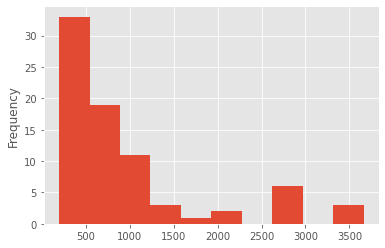

In [19]:
group_a.query('rev > 0').rev.plot(kind="hist")

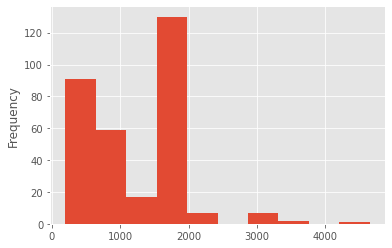

In [20]:
group_b.query('rev > 0').rev.plot(kind="hist")

In [24]:
# отнесем к группе А пользователей соответствующей группы, но тех, которые совершали покупку
group_a_purchased = visits_group.query('grp == "A" and visit == 1 and rev > 0')

In [25]:
# отнесем к группе В пользователей соответствующей группы, но тех, которые совершали покупку
group_b_purchased = visits_group.query('grp == "B" and visit == 1 and rev > 0')

>На графиках заметно, что данные распределены не нормально и наблюдается наличие выбросов.
Для проверки логично выбрать бутстрэп, как метод проверки гипотез с помощью повторных выборок.
>Так как данных по покупкам не особо много, распределение ненормально.

>Далее, действительно мне следовало изначально корректно сформулировать гипотезы.
>>Нулевая гипотеза H0 - средняя прибыль от одного платящего пользователя, совершиго покупку, для обеих групп равна;
>>Альтернативная гипотеза H1 - средняя прибыль от одного платящего пользователя, совершиго покупку, для обеих групп равна отличаются.


In [26]:
group_a = group_a_purchased['rev']
group_b = group_b_purchased['rev']

In [27]:
def get_bootstrap(
    
    group_a,  # числовые значения первой выборки
    group_b,  # числовые значения второй выборки
    boot_it=1000,  # количество бутстрэп-подвыборок
    statistic=np.mean,  # интересующая нас статистика
    bootstrap_conf_level=0.95  # уровень значимости
    
):
    boot_len = max([len(group_a), len(group_b)])
    boot_data = []
    for i in tqdm(range(boot_it)):  # извлекаем подвыборки
        
        samples_1 = group_a.sample(
            boot_len, 
            replace=True  # параметр возвращения
        ).values
        
        samples_2 = group_b.sample(
            boot_len, 
            replace=True
        ).values
        
        boot_data.append(statistic(samples_1 - samples_2))  # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level) / 2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x=0, 
        loc=np.mean(boot_data), 
        scale=np.std(boot_data)
    )
    
    p_2 = norm.cdf(
        x=0, 
        loc=-np.mean(boot_data), 
        scale=np.std(boot_data)
    )
    
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    plt.hist(pd_boot_data[0], bins=50)
    
    plt.style.use('ggplot')
    plt.vlines(ci, ymin=0, ymax=50, linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "ci": ci, 
            "p_value": p_value}

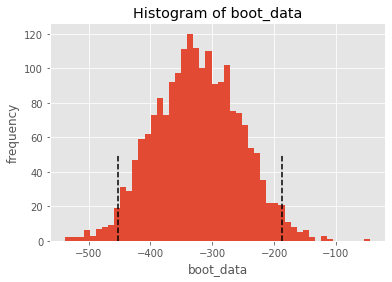

p-value = 2.826149991884537e-06


In [28]:
booted_data = get_bootstrap(group_a, group_b, boot_it=2000)
print(f'p-value = {booted_data["p_value"]}')


### Вывод:

>  Сравнение средних с помощью бутстрап метода показывает, что между нашими данными есть различия - при вычитании значений из бутстрапированной выборки по группе А значений из выборки по группе В 0 не попадает в доверительный интервал. 
p-value < 0.05, 0 не попадает в доверительный интервал при заданном уровне значимости 95% -> отклоняем нулевую гипотезу о равенстве средних значений оплат в группах.

>В данном случае мы вычитали значения среднего тестовой группы из значений в контрольной, и разница получилась отрицательной, следовательно, мы отклоняем нулевую гипотезу о равенстве средних чеков и делаем вывод, что средний чек в тестовой группе значимо выше, чем в контрольной.

>В связи с этим, делаем вывод, что средний чек в тестовой группе  больше.  Можем рекомендовать запуск новой механики оплаты для всех пользователей, положительные изменения статзначимы.


# Задание 2. SQL
### 2.1 Очень усердные ученики
    
> Образовательные курсы состоят из различных уроков, каждый из которых состоит из нескольких маленьких заданий. Каждое такое маленькое задание называется "горошиной".
Назовём очень усердным учеником того пользователя, который хотя бы раз за текущий месяц правильно решил 20 горошин.

In [29]:
 import pandahouse as ph

In [30]:
# подключение к Clickhouse
connection_default = {'host': 'http://clickhouse.beslan.pro:8080',
 'database': 'default',
 'user': 'student',
 'password': 'dpo_python_2020'}

In [32]:
q = '''
SELECT COUNT(a.st_id) as count_diligent_st
FROM
(
    SELECT st_id
    FROM default.peas
    WHERE
        timest >= '2020-03-01' AND
        timest <= '2020-03-31'
    GROUP BY st_id
    HAVING SUM(correct) >= 20
) a
'''
# отправляем запрос и записываем результат в пандасовский датафрейм
q_select = ph.read_clickhouse(query=q, connection=connection_default)
q_select

,count_diligent_st
0,0


### 2.2 Оптимизация воронки

> Образовательная платформа предлагает пройти студентам курсы по модели trial: студент может решить бесплатно лишь 30 горошин в день. Для неограниченного количества заданий в определенной дисциплине студенту необходимо приобрести полный доступ. Команда провела эксперимент, где был протестирован новый экран оплаты.
    
> Необходимо в одном запросе выгрузить следующую информацию о группах пользователей:
- ARPU 
- ARPAU 
- CR в покупку 
- СR активного пользователя в покупку 
- CR пользователя из активности по математике (subject = ’math’) в покупку курса по математике
- ARPU считается относительно всех пользователей, попавших в группы.

In [33]:
w = '''
SELECT 
    test_grp,
    SUM(df.money)/uniqExact(ds.st_id) as ARPU,
    SUMIf(df.money, active.isActive > 10)/uniqIf(ds.st_id, active.isActive > 10) as ARPAU,
    round(100*uniqIf(ds.st_id, df.money > 0)/uniqExact(ds.st_id),2) as CR,
    round(100*uniqIf(ds.st_id, active.isActive > 10 and df.money > 0)/uniqIf(ds.st_id, active.isActive > 10),2) as CR_active,
    round(100*uniqIf(ds.st_id, active.isActiveMath > 1 and df.subject = 'Math' and df.money > 0) /
        uniqIf(ds.st_id, active.isActiveMath > 1),2) as CR_active_math
FROM default.studs as ds
LEFT JOIN (
            SELECT 
                st_id, SUM(correct) as isActive, SUMIf(correct, subject = 'Math') as isActiveMath
            FROM default.peas
            GROUP BY st_id
            ) as active  
ON ds.st_id = active.st_id
LEFT JOIN default.final_project_check as df
ON ds.st_id = df.st_id
GROUP BY test_grp
'''
# отправляем запрос и записываем результат в пандасовский датафрейм
w_select = ph.read_clickhouse(query=w, connection=connection_default)
w_select

,test_grp,ARPU,ARPAU,CR,CR_active,CR_active_math
0,control,4540.983607,10393.700787,4.92,11.02,6.12
1,pilot,11508.474576,29739.583333,10.85,26.04,9.52


### Задание 3. Python

> Реализуйте функцию, которая будет автоматически подгружать информацию из дополнительного файла groups_add.csv (заголовки могут отличаться) и на основании дополнительных параметров пересчитывать метрики.
Реализуйте функцию, которая будет строить графики по получаемым метрикам.

In [34]:
def get_metrics(file):

    # для точности прописываем типы данных и названия колонок
    types = {'id': str, 'grp': str}
    new_names = ['id', 'grp']

    # считывание данных из файлов
    
    groups=pd.read_csv('Проект_2_groups.csv', sep=';', names=new_names, header=0, dtype=types)
    groups_add=pd.read_csv('Проект_2_group_add.csv', names=new_names, header=0, dtype=types)
    active_studs=pd.read_csv('Проект_2_active_studs.csv', sep=',', names=['id'], header=0, dtype={'id': str})
    checks=pd.read_csv('Проект_2_checks.csv', sep=';', names=['id', 'rev'], header=0, dtype={'id': str, 'rev': float})
    
    # соединение таблиц
    df = groups.append(groups_add) \
        .merge(active_studs, how='right', on='id') \
        .merge(checks, how='left', on='id')

    # заполнение пропусков
    df['rev'] = df['rev'].fillna(0)
   
    #вычисление количества пользователей в тестовой и контрольной группах
    metrics = df.groupby('grp', as_index=False) \
            .agg(active_users=('id', 'count'))
    
    # вычисление количества пользователей, совершивших покупку 
    purchases = df.query('rev > 0') \
                .groupby('grp', as_index=False) \
                .agg(purchases=('id', 'count'))
    
    total_rev = df.groupby('grp', as_index=False) \
                .agg(total_rev=('rev', 'sum')) \
                .round(2)

    # соединение метрик
    metrics = metrics.merge(purchases, on='grp').merge(total_rev, on='grp')

    metrics['CR'] = round(metrics.purchases / metrics.active_users, 3)
    metrics['ARPPU'] = round(metrics.total_rev / metrics.purchases, 2)
    metrics['ARPAU'] = round(metrics.CR * metrics.ARPPU, 2)
    
    return metrics

In [35]:
metrics = get_metrics('Проект_2_group_add.csv')
metrics

,grp,active_users,purchases,total_rev,CR,ARPPU,ARPAU
0,A,1538,78,72820.0,0.051,933.59,47.61
1,B,6803,314,394974.0,0.046,1257.88,57.86


In [36]:
def get_pics(df):
    
    plt.subplots(4, 1, figsize=(10, 6))
    
    plt.subplot(4, 1, 1)
    plt.barh(metrics.grp, metrics.total_rev)
    plt.title('Total Revenue')
    plt.ylabel('Group')
    plt.xlabel('Rub')

    plt.subplot(4, 1, 2)
    plt.barh(metrics.grp, metrics.CR)
    plt.title('Convertion Rate')
    plt.ylabel('Group')
    plt.xlabel('Dole')
    
    plt.subplot(4, 1, 3)
    plt.barh(metrics.grp, metrics.ARPPU)
    plt.title('ARPPU')
    plt.ylabel('Group')
    plt.xlabel('Rub')
    
    plt.subplot(4, 1, 4)
    plt.barh(metrics.grp, metrics.ARPAU)
    plt.title('ARPAU')
    plt.ylabel('Group')
    plt.xlabel('Rub')

    plt.subplots_adjust(wspace=3, hspace=2)

    plt.show()

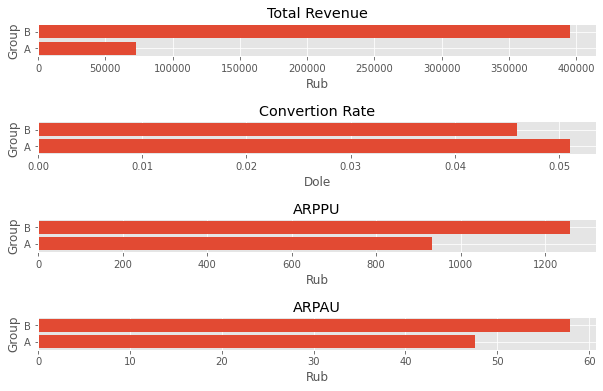

In [37]:
get_pics(metrics)